### 加载包

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn import cross_validation,metrics
# from sklearn.grid_search import GridSearchCV
from sklearn.feature_selection import SelectKBest,SelectPercentile

import pylab as plt
%matplotlib inline
# from matplotlib.pylab import rcParams
# rcParams['figure.figsize'] = 12,4

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 读取数据

In [2]:
train_data =  pd.read_csv("pfm_train.csv")
test_data = pd.read_csv("pfm_test.csv")
train_data.iloc[[1099]]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1099,26,1,Travel_Frequently,Research & Development,2,3,Life Sciences,1053,1,Male,...,2,80,1,6,2,3,3,2,1,2


### 数据没有缺失值

In [3]:
train_data.shape,test_data.shape

train_data.apply(lambda x:sum(x.isnull()))
test_data.apply(lambda  x:sum(x.isnull()))

Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

### numerical coding

In [4]:
train_keys = []
for i in train_data:
    train_keys.append(i)

test_keys = []
for i in test_data:
    test_keys.append(i)

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_to_encode_train = train_keys
var_to_encode_test = test_keys

for i in var_to_encode_train:
    train_data[i] = le.fit_transform(train_data[i])

for i in var_to_encode_test:
    test_data[i] = le.fit_transform(test_data[i])

### 划分feature和label

In [6]:
labels = train_data["Attrition"]
features = train_data.drop("Attrition",axis=1)

In [7]:
features

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,19,2,1,0,3,1,42,0,1,1,...,2,0,1,7,2,3,7,5,0,7
1,36,1,1,0,3,1,667,3,0,2,...,0,0,1,33,2,0,5,4,1,4
2,16,1,1,6,2,1,78,0,1,0,...,3,0,0,9,3,2,9,7,0,6
3,21,2,1,0,0,1,549,3,0,1,...,2,0,1,21,3,2,21,6,11,8
4,10,1,1,0,2,3,602,0,1,1,...,0,0,2,1,2,2,1,0,0,0
5,6,2,2,3,0,3,766,3,0,2,...,2,0,2,5,3,2,5,4,0,3
6,11,2,1,8,4,4,244,1,1,1,...,2,0,0,4,2,2,3,2,2,2
7,18,2,2,1,1,3,278,1,1,1,...,1,0,2,10,2,2,10,9,9,0
8,15,2,1,3,3,3,162,2,0,1,...,3,0,0,7,3,2,3,2,1,1
9,16,2,1,1,3,5,733,2,0,2,...,3,0,0,14,2,3,14,11,4,11


### 特征选择

In [8]:
selection = SelectPercentile(percentile=30)
selection.fit(features,labels)
selection.transform(features)
print(selection.get_support())
print(selection.scores_)
# features_new = pd.DataFrame(features_new)
features_new = features.loc[:,selection.get_support()]
features_new
test_data_new = test_data.loc[:,selection.get_support()]

[ True False False False False False False False False False  True False
 False  True  True False False  True False False False False False  True
 False False  True  True False  True]
[ 34.84951668   0.26327029   3.13568303   8.68005002   2.37867472
   0.1096846    2.1828275   10.42996282   0.30813249  16.78945939
  32.19336995   8.35465783  17.58989688  34.95034957  43.98742256
   0.73640355          nan  84.33825901   0.77766701   2.40622412
   2.9482818           nan  21.47339584  40.34743547   2.0716178
   2.62039525  24.35445314  29.99145881   5.68349017  28.31616217]


D:\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [16 21] are constant.
  UserWarning)
D:\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


### 用kfold划分训练测试集，并计算平均得分

In [9]:
def score(clf):
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=10,shuffle=True)
    score = 0
    count = 0
    for train_index,test_index in kf.split(features_new):
    #     print("TRAIN",train_index,'\n','TEST',test_index)
        features_train, features_test = features_new.iloc[train_index], features_new.iloc[test_index]
        labels_train, labels_test = labels.iloc[train_index], labels.iloc[test_index]
        
        clf = clf.fit(features_train,labels_train)
        score += clf.score(features_test,labels_test)
        if count == 9:
            mean_score = score/10
        count += 1
    return mean_score


### Adaboost

In [15]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=1000)
clf.fit(features_new,labels)
pred = clf.predict(test_data_new)
np.savetxt('result.csv',pred,delimiter=',',fmt='%d',header='result')
score(clf)

0.8290909090909091

### XGboot

In [17]:
def modelfit(alg,features=features_new,labels=labels,test_data=test_data_new,useTrain=True,cv=5,early=50):
    if useTrain:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(features.values,label=labels.values)
        xgtest = xgb.DMatrix(test_data.values)
        cvresult = xgb.cv(xgb_param,xgtrain,num_boost_round=alg.get_params()['n_estimators'],nfold=cv,metrics='auc',early_stopping_rounds=early)
        print(cvresult.shape[0])
        alg.set_params(n_estimators=cvresult.shape[0])

    alg.fit(features,labels,eval_metric='auc')
    
    dtrain_predictions = alg.predict(features)
    dtrain_predprob = alg.predict_proba(features)[:,1]

    print('Model Report')
    print('Accuracy:%.4g' % metrics.accuracy_score(labels.values,dtrain_predictions))
    print('AUC Score(train):%f' % metrics.roc_auc_score(labels,dtrain_predprob))

    feat_imp = pd.Series(xgb1.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar',title="feature importances")
    plt.ylabel('feature importances socre')

In [18]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

xgb1 = XGBClassifier(
    learning_rate=0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27)


50
Model Report
Accuracy:0.9027
AUC Score(train):0.959858


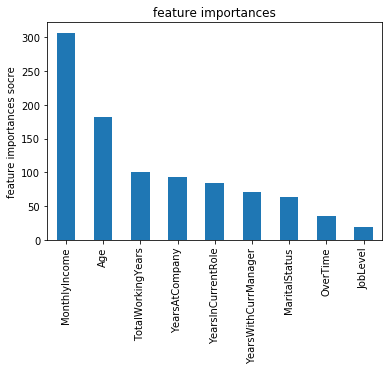

In [19]:
modelfit(xgb1)

In [20]:
# pred = xgb1.predict(test_data_new)
# np.savetxt('result.csv',pred,delimiter=',',fmt='%d',header='result')

### 调参

In [21]:
%%time
param_test1 = {
    'max_depth':range(3,10),
    'min_child_weight':range(0,10)
}
gs1 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1,n_estimators=50,max_depth=5,
                                min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,
                                objective='binary:logistic',nthread=4,scale_pos_weight=1,seed=27),
                param_grid=param_test1,scoring='roc_auc',n_jobs=4,iid=False,cv=5)
gs1.fit(features,labels)

Wall time: 13.3 s


In [22]:
gs1.grid_scores_,gs1.best_params_,gs1.best_score_

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.80113, std: 0.02021, params: {'max_depth': 3, 'min_child_weight': 0},
  mean: 0.80755, std: 0.02041, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.80798, std: 0.01868, params: {'max_depth': 3, 'min_child_weight': 2},
  mean: 0.81444, std: 0.02023, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.80667, std: 0.02126, params: {'max_depth': 3, 'min_child_weight': 4},
  mean: 0.80690, std: 0.01936, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.80025, std: 0.01233, params: {'max_depth': 3, 'min_child_weight': 6},
  mean: 0.80486, std: 0.00945, params: {'max_depth': 3, 'min_child_weight': 7},
  mean: 0.79625, std: 0.01189, params: {'max_depth': 3, 'min_child_weight': 8},
  mean: 0.80309, std: 0.01716, params: {'max_depth': 3, 'min_child_weight': 9},
  mean: 0.79774, std: 0.01744, params: {'max_depth': 4, 'min_child_weight': 0},
  mean: 0.80146, std: 0.02071, params: {'max_depth': 4, 'min_child_weight': 1},
  mean: 0.80073, std: 0.02183, params: {

In [33]:
param_test2 = {
    'gamma':[i/10.0 for i in range(0,5)]
}
gs2 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1,n_estimators=50,max_depth=3,
                                min_child_weight=3,gamma=0,subsample=0.8,colsample_bytree=0.8,
                                objective='binary:logistic',nthread=4,scale_pos_weight=1,seed=27),
                param_grid=param_test2,scoring='roc_auc',n_jobs=4,iid=False,cv=5)
gs2.fit(features,labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=3, missing=None, n_estimators=50, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [34]:
gs2.grid_scores_,gs2.best_params_,gs2.best_score_

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.81444, std: 0.02023, params: {'gamma': 0.0},
  mean: 0.81432, std: 0.02046, params: {'gamma': 0.1},
  mean: 0.81079, std: 0.02018, params: {'gamma': 0.2},
  mean: 0.81216, std: 0.01991, params: {'gamma': 0.3},
  mean: 0.81268, std: 0.02010, params: {'gamma': 0.4}],
 {'gamma': 0.0},
 0.81444050416876512)

In [24]:
xgb2 = XGBClassifier(
    learning_rate=0.1,
    n_estimators=1000,
    max_depth=3,
    min_child_weight=3,
    gamma=0.0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27)


45
Model Report
Accuracy:0.8745
AUC Score(train):0.869930


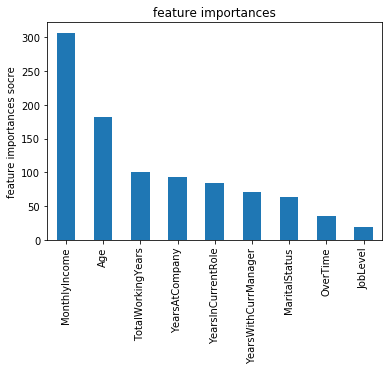

In [25]:
modelfit(xgb2)

In [26]:
%%time
param_test3 = {
    'subsample':[i/10.0 for i in range(6,11)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gs3 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1,n_estimators=45,max_depth=3,
                                min_child_weight=3,gamma=0.0,subsample=0.8,colsample_bytree=0.8,
                                objective='binary:logistic',nthread=4,scale_pos_weight=1,seed=27),
                param_grid=param_test3,scoring='roc_auc',n_jobs=4,iid=False,cv=5)
gs3.fit(features,labels)

Wall time: 5.5 s


In [27]:
gs3.grid_scores_,gs3.best_params_,gs3.best_score_

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.81103, std: 0.01034, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: 0.80736, std: 0.01760, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: 0.81061, std: 0.01514, params: {'colsample_bytree': 0.6, 'subsample': 0.8},
  mean: 0.79898, std: 0.02408, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: 0.78975, std: 0.02226, params: {'colsample_bytree': 0.6, 'subsample': 1.0},
  mean: 0.81045, std: 0.01363, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: 0.80997, std: 0.01985, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: 0.80966, std: 0.02295, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: 0.79435, std: 0.01726, params: {'colsample_bytree': 0.7, 'subsample': 0.9},
  mean: 0.79446, std: 0.02211, params: {'colsample_bytree': 0.7, 'subsample': 1.0},
  mean: 0.79838, std: 0.01292, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: 0.80382, std: 0.01720, params: {'colsample_bytree': 0.8, 'subsample'

In [28]:
%%time
param_test4 = {
    'reg_alpha':[i/100 for i in range(40,60)]
}
gs4 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1,n_estimators=45,max_depth=3,
                                min_child_weight=3,gamma=0.0,subsample=0.8,colsample_bytree=0.8,
                                objective='binary:logistic',nthread=4,scale_pos_weight=1,seed=27),
                param_grid=param_test4,scoring='roc_auc',n_jobs=4,iid=False,cv=5)
gs4.fit(features,labels)

Wall time: 5.87 s


In [29]:
gs4.grid_scores_,gs4.best_params_,gs4.best_score_

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.80844, std: 0.01986, params: {'reg_alpha': 0.4},
  mean: 0.80600, std: 0.01691, params: {'reg_alpha': 0.41},
  mean: 0.80531, std: 0.01727, params: {'reg_alpha': 0.42},
  mean: 0.80589, std: 0.01988, params: {'reg_alpha': 0.43},
  mean: 0.80634, std: 0.01980, params: {'reg_alpha': 0.44},
  mean: 0.80584, std: 0.01991, params: {'reg_alpha': 0.45},
  mean: 0.80467, std: 0.01995, params: {'reg_alpha': 0.46},
  mean: 0.80260, std: 0.01859, params: {'reg_alpha': 0.47},
  mean: 0.80145, std: 0.01955, params: {'reg_alpha': 0.48},
  mean: 0.80231, std: 0.01873, params: {'reg_alpha': 0.49},
  mean: 0.80395, std: 0.01630, params: {'reg_alpha': 0.5},
  mean: 0.80410, std: 0.01994, params: {'reg_alpha': 0.51},
  mean: 0.80392, std: 0.01975, params: {'reg_alpha': 0.52},
  mean: 0.80710, std: 0.02083, params: {'reg_alpha': 0.53},
  mean: 0.80753, std: 0.02126, params: {'reg_alpha': 0.54},
  mean: 0.80575, std: 0.02212, params: {'reg_alpha': 0.55},
  mean: 0.80735, std: 0.02031, params: {'r

In [30]:
xgb3 = XGBClassifier(
    learning_rate=0.1,
    n_estimators=1000,
    max_depth=3,
    min_child_weight=3,
    gamma=0.0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27,
    reg_alpha=0.4)


46
Model Report
Accuracy:0.8745
AUC Score(train):0.869123


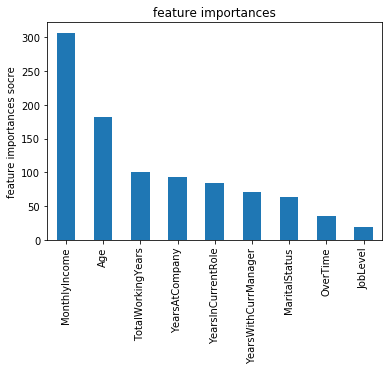

In [31]:
modelfit(xgb3)

34
Model Report
Accuracy:0.8673
AUC Score(train):0.802006


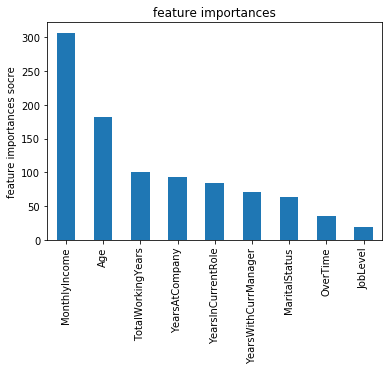

In [32]:
xgb4 = XGBClassifier(
    learning_rate=0.01,
    n_estimators=5000,
    max_depth=3,
    min_child_weight=3,
    gamma=0.0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27,
    reg_alpha=0.4)

xgb4.fit(features,labels)
pred = xgb4.predict(test_data)

modelfit(xgb4)

### 最佳

In [47]:
pred = xgb4.predict(test_data_new)
np.savetxt('result.csv',pred,delimiter=',',fmt='%d',header=r'result')

In [48]:
%%time
score(xgb4)

Wall time: 130 ms


0.85090909090909084

###  RandomForest

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
# clf = DecisionTreeClassifier()
# clf = clf.fit(features,labels)
# pred = clf.predict(test_data)

rfc = RandomForestRegressor()
rfc = rfc.fit(features,labels)


### 调参

In [ ]:
# n_estimators
from sklearn.model_selection import GridSearchCV
print(rfc.get_params)
parms = {'n_estimators':range(1,100,5)}
gs = GridSearchCV(rfc,parms)
gs.fit(features,labels)
print(gs.best_score_)
print(gs.best_params_)


In [ ]:
parms = {'n_estimators':[8,81,61]}
gs = GridSearchCV(rfc,parms)
gs.fit(features,labels)
print(gs.best_score_)
gs.best_params_

In [ ]:
parms = {'max_depth':range(3,10,2)}
gs = GridSearchCV(RandomForestClassifier(n_estimators=81),parms)
gs.fit(features,labels)
print(gs.best_score_)
gs.best_params_

### 最佳参数做拟合，预测

In [ ]:
rfc = RandomForestClassifier(n_estimators=81,max_depth=7)
rfc.fit(features,labels)
pred = rfc.predict(test_data)
pred
# np.savetxt('result.csv',pred,delimiter=',',fmt='%d',header='result')

In [ ]:
score(rfc)

### LR

In [55]:
from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV()
lr.fit(features,labels)
lr.predict(test_data)
# np.savetxt('result.csv',pred,delimiter=',',fmt='%d',header='result')
lr.get_params

<bound method BaseEstimator.get_params of LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)>

### 调参

In [56]:
parms = {'solver':['newton-cg','lbfgs','liblinear','sag']}
gs = GridSearchCV(lr,parms)
gs.fit(features,labels)
print(gs.best_score_)
print(gs.best_params_)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.87
{'solver': 'newton-cg'}


In [58]:
parms = {'multi_class':['ovr','multinomial']}
gs = GridSearchCV(LogisticRegressionCV(solver='newton-cg'),parms)
gs.fit(features,labels)
print(gs.best_score_)
print(gs.best_params_)


0.87
{'multi_class': 'ovr'}


In [67]:
# parms = {'C':[x/10 for x in range(1,11)]}
# gs = GridSearchCV(LogisticRegressionCV(solver='newton-cg',multi_class='ovr'))
# gs.fit(features,labels)
# print(gs.best_score_)
# print(gs.best_params_)

clf = LogisticRegressionCV(solver='newton-cg',multi_class='ovr')
clf.fit(features_new,labels)
pred = clf.predict(test_data_new)
np.savetxt('result.csv',pred,delimiter=',',fmt='%d',header=r'result')
score(clf)


D:\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


0.85454545454545472

In [53]:
lr = LogisticRegression(solver='newton-cg',multi_class='ovr',class_weight='balanced',C=0.3,random_state=42)
lr.fit(features,labels)
lr.predict(test_data)
np.savetxt('result.csv',pred,delimiter=',',fmt='%d',header='result')

In [54]:
score(lr)

0.72454545454545449

### SVC

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc = svc.fit(features,labels)
svc.get_params

### 调参

In [ ]:
parms = {'C':range(1,5)}
gs = GridSearchCV(svc,parms)
gs.fit(features,labels)
print(gs.best_score_)
print(gs.best_params_)

### 最佳拟合

In [ ]:
svc = SVC(C=1)
svc = svc.fit(features,labels)
svc.predict(test_data)

### 验证

In [ ]:
score(svc)

### NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(features,labels)
clf.score(features,labels)
# pred = clf.predict(test_data)
# np.savetxt('result.csv',pred,delimiter=',',fmt='%d',header='#result')

In [ ]:
score(clf)